# Regression

One of the most important and common question concerning data analysis if there is a statistical relationship between a response variable $Y$ and explanatory variables $X_i$. An common, powerful framework to address this question is to employ regression analysis in order to model the relationship. There are various types of regression analysis. The type of the regression model depends on the type of the distribution of the response variable $Y$; if it is continuous we use a linear regression model and if it is binary (i.e., 0 or 1) we use logistic regression. By modeling we try to predict the outcome $Y$ based on values of a set of predictor variables $X_i$ and noise $\epsilon$. These methods allow us to assess the effects that the predictors $X_i$ have in the outcome $Y$. 

We will cover four different types of regression:

1) Linear Regression (Models the value of one continuous outcome Y given one continuous or discrete predictor X)

$$Y = c_0 + c_1 X + \epsilon$$

2) Multiple Linear Regression (Models the value of one continuous outcome Y given multiple continuous, discrete, or categorical predictors Xi)

$$Y = c_0 + c_1 X_1 + c_2 X_2 + c_3 X_3 + \dots + c_n X_n + \epsilon$$

3) Logistic Regression (Models the probability of a binary outcome Y given one continuous or discrete predictor X)

$$ \frac{p(Y)}{1-p(Y)} = c_0 + c_1 X + \epsilon$$

4) Multiple Logistic Regression (Models the probability of a binary outcome Y given multiple continuous, discrete, or categorical predictors Xi)

$$\frac{p(Y)}{1-p(Y)} = c_0 + c_1 X_1 + c_2 X_2 + c_3 X_3 + \dots + c_n X_n + \epsilon$$

Before we start, we import the libraries we are going to need and we clean up the data a little bit.

### Import libraries

In [1]:
# First, we import the libraries we will use in this notebook and load the Fragile Families data. 
# The first line sets maplotlib plots to show inside the notebook.
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import pandas as pd
import sys
sys.path.append('..')
import ff

# Directory with cleaned data
background = "../../ai4all_data/background.csv"
train = "../../ai4all_data/train.csv"
output_dir = "../output"

### Data preprocessing

In [ ]:
# Read in data
data_frame = pd.read_csv(background, low_memory=False)
# move from the original index (starting from 0) to the challengeID index
data_frame = data_frame.set_index('challengeID')

**Next, we clean the data and get a data frame with all numeric elements for future use.**

In [4]:
# Replace missing values with -3 (-3 represents missing data in the fragile family project)
data_frame = data_frame.replace('missing', -3)
# Transform all entries in data_frame to numeric 
data_frame = data_frame.apply(lambda x: pd.to_numeric(x, errors='ignore'))
# remove all non-numeric elements
data_frame = data_frame.select_dtypes(include = [np.number])

print(data_frame.shape)
data_frame.head()

(4242, 12795)


,m1intmon,m1intyr,m1lenhr,m1lenmin,cm1twoc,cm1fint,cm1tdiff,cm1natsm,m1natwt,cm1natsmx,...,m4d9,m4e23,f4d6,f4d7,f4d9,m5c6,m5d20,m5k10,f5c6,k5f1
challengeID,,,,,,,,,,,,,,,,,,,,,
1,-3,NaN,-3,40,NaN,0,NaN,NaN,NaN,NaN,...,-3.0,-3.000000,-3.000000,-3.000000,-3.0,-3.000000,-3.000000,-3,-3.000000,-3.000000
2,-3,NaN,0,40,NaN,1,NaN,NaN,NaN,NaN,...,-3.0,8.473318,-3.000000,-3.000000,-3.0,-3.000000,9.845074,-3,-3.000000,9.723551
3,-3,NaN,0,35,NaN,1,NaN,NaN,NaN,NaN,...,-3.0,-3.000000,9.097495,10.071504,-3.0,-3.000000,-3.000000,-3,-3.000000,-3.000000
4,-3,NaN,0,30,NaN,1,NaN,NaN,NaN,NaN,...,-3.0,-3.000000,9.512706,10.286578,-3.0,10.677285,-3.000000,-3,8.522331,10.608137
5,-3,NaN,0,25,NaN,1,NaN,NaN,NaN,NaN,...,-3.0,-3.000000,11.076016,9.615958,-3.0,9.731979,-3.000000,-3,10.115313,9.646466


In [5]:
# read outcome data
outcome = pd.read_csv(train, low_memory=False)

print(outcome.shape)
outcome.head()

(2121, 7)


,challengeID,gpa,grit,materialHardship,eviction,layoff,jobTraining
0,1,NaN,NaN,NaN,NaN,NaN,NaN
1,3,NaN,NaN,NaN,NaN,NaN,NaN
2,6,NaN,3.50,0.090909,0.0,0.0,0.0
3,7,2.5,3.25,0.000000,0.0,0.0,0.0
4,8,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# set outcome data index to challengeID so that we can match outcome entries with data_frame entries
outcome = outcome.set_index('challengeID')
# Remove null entries
outcome = outcome.loc[~outcome['gpa'].isnull()]

print(outcome.shape)
outcome.head()

(1165, 6)


,gpa,grit,materialHardship,eviction,layoff,jobTraining
challengeID,,,,,,
7,2.50,3.25,0.000000,0.0,0.0,0.0
9,2.25,4.00,0.181818,0.0,0.0,0.0
10,3.25,3.25,0.090909,0.0,NaN,0.0
13,2.75,4.00,0.181818,0.0,0.0,1.0
14,3.25,2.75,0.272727,0.0,1.0,0.0


Now we have two data sets. The first data set, called data_frame contains the cleaned data which we will use to infer/predict the data in the second data set called outcome. 

**Observe that the challengeID reflects which rows remain in the outcome DataFrame after NaN removal.**

## Linear Regression

Linear regression is a linear approach to modelling the relationship between a continuous variable (called the outcome or the dependent variable) and one explanatory variable (called predictor or independent variable). 

In linear regression, we plot the data on a scatter plot and then compute the best-fit line through the data points. The term "best-fit" refers to the fact that the resulting line minimizes the squared distance between the data points and the line. 

The best-fit line is described by the equation:

$$Y = c_0 + c_1 X + \epsilon$$

where $c_0$ is the regression coefficient associated with the value of $Y$ when $X=0$, $c_1$ is the regression coefficient that tells us by how much $Y$ changes when $X$ is not zero, and $\epsilon$ is noise. For now, we will set $\epsilon$ to zero, meaning we will ignore the effects of noise. The resulting equation $Y = c_0 + c_1 X$ is just the equation for a line with $c_0$ as its y-intercept and $c_1$ is its slope. 

The best-fit line provides what is known as a linear model which allows us to make predictions about the value of $Y$ given the value of $X$.

In this section we will build a linear regression model to predict the child's GPA scores. As a predictor, we will use language and literacy skills (feature `t5c13a`), science and social skills (feature `t5c13b`), and math skills (feature `t5c13c`).

**Pick out the students' language and literacy skills (`t5c13a`), social science skills (`t5c13b`), math skills (`t5c13c`) from the cleaned data frame**

In [7]:
# Choose only those rows of data_frame that are left in outcome
rows_remaining_outcome = outcome.index.values
rows_to_keep_dataframe = data_frame.index.isin(rows_remaining_outcome)
data_frame = data_frame.loc[rows_to_keep_dataframe]

# subselect the three columns we are interested in
skills_columns = data_frame[['t5c13a', 't5c13b', 't5c13c']]

print(skills_columns.shape)
skills_columns.head()

(1165, 3)


,t5c13a,t5c13b,t5c13c
challengeID,,,
7,-9,-9,-9
9,1,2,2
10,-9,-9,-9
13,-9,-9,-9
14,3,4,4


**Impute data by removing non-valid entries**

In [8]:
# Pick out students whose skills are non-missing (above 0 values)
X = skills_columns[(skills_columns>0).all(1)]
# The .all(1) function says "apply the >0 condition only if all columns (all elements across dimension 1) fulfull it.
# This guarantees that only the rows where all skills have non-missing values will be selected.
print(X.shape)
X.head()

(734, 3)


,t5c13a,t5c13b,t5c13c
challengeID,,,
9,1,2,2
14,3,4,4
16,1,2,2
18,2,2,2
23,2,4,3


**Pick outcome entries that match the entries in the imputed data_frame**

In [9]:
Y = outcome.loc[outcome.index.isin(X.index.values)]

print(Y.shape)
Y.head()

(734, 6)


,gpa,grit,materialHardship,eviction,layoff,jobTraining
challengeID,,,,,,
9,2.25,4.00,0.181818,0.0,0.0,0.0
14,3.25,2.75,0.272727,0.0,1.0,0.0
16,2.00,3.50,0.090909,0.0,0.0,1.0
18,2.25,3.00,0.000000,0.0,1.0,0.0
23,2.50,3.25,0.000000,0.0,0.0,0.0


In [10]:
#picks out GPA
GPA = Y.gpa

#make sure the the number of rows are the same
print(X.shape)
print(GPA.shape)

(734, 3)
(734,)


We have our data ready! We can now move to perform our first regression task - linear regression! 

### Linear regression for GPA using language and literacy skills ('t5c13a') as predictor 
In this subsection, we are gonna predict GPA based on a single feature - language and literacy skills (`t5c13a`). Intuitively, better language and literacy skills would result in a better GPA. Indeed, GPA depends on a lot of factors and language and literacy skill is only one of them. 

The language and literacy skill can take values 1,2,3,4,5. This is a categorical variable. The GPA data in the data is rounded to a scale of 0.25. This is a discrete variable. We emphasize that regression is a tool that estimate the correlation between two continuous variables. 

Because of the nature of the fragile framily study, most of the collected data are discretized, like GPA. In our regression analysis, we will first split the 734 samples into training set and test set, and then investigate the correlation between the language and literacy skill and the *average GPA* using linear regression techniques.

In [11]:
# First, let's split our data into train and test sets
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X.t5c13a, GPA, test_size = 0.3, random_state = 100)

print(X_train.shape)
print(X_test.shape)

(513,)
(221,)


C:\Users\Renato\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


**Since we are gonna calculate the mean GPA for each category of language skills and it's a repetitive task, we write a function to perform the task**

In [12]:
def category_mean(category_five, gpa):

    # Calculate average GPA for students whose language and literacy skills are far below average
    one = category_five.loc[category_five == 1 ]
    one_gpa = gpa.loc[gpa.index.isin(one.index.values)]
    one_gpa_mean = np.mean(one_gpa)
    # Calculate average GPA for students whose language and literacy skills are below average
    two = category_five.loc[category_five == 2]
    two_gpa = gpa.loc[gpa.index.isin(two.index.values)]
    two_gpa_mean = np.mean(two_gpa)
    # Calculate average GPA for students whose language and literacy skills are average
    three = category_five.loc[category_five == 3 ]
    three_gpa = gpa.loc[gpa.index.isin(three.index.values)]
    three_gpa_mean = np.mean(three_gpa)
    # Calculate average GPA for students whose language and literacy skills are above average
    four = category_five.loc[category_five == 4 ]
    four_gpa = gpa.loc[gpa.index.isin(four.index.values)]
    four_gpa_mean = np.mean(four_gpa)
    # Calculate average GPA for students whose language and literacy skills are far above average
    five = category_five.loc[category_five == 5 ]
    five_gpa = gpa.loc[gpa.index.isin(five.index.values)]
    five_gpa_mean = np.mean(five_gpa)

    return np.array([one_gpa_mean,two_gpa_mean,three_gpa_mean,four_gpa_mean,five_gpa_mean])

**We calculate the mean of GPA in each category and plot them versus language/literacy skills.**

[ 2.64150943  2.70247934  2.87948718  3.10169492  3.33653846]


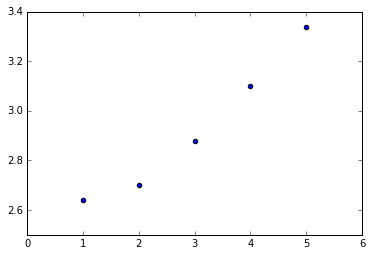

In [13]:
GPA_mean = category_mean(X_train,y_train)
print(GPA_mean)
Categories = np.array([1,2,3,4,5])
plt.scatter(Categories, GPA_mean)
plt.show()

Could you see the trend? It tells us that our intuition is correct. We now seek a linear regression model using this training data and see if we can use this model to predict the mean GPA of the test data.

There are numerous ways to do linear regression in Python. Here we show three of them, using package `numpy.polyfit`, `scipy.stats.linregress` and `sklearn.linear_model.LinearRegression`.

**Let's do linear regression with `numpy.polyfit`** You can learn about this function at <https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.polyfit.html>


slope : 0.17892736315636545
intercept : 2.3955597763479273
mean square error : 0.002423846615611568


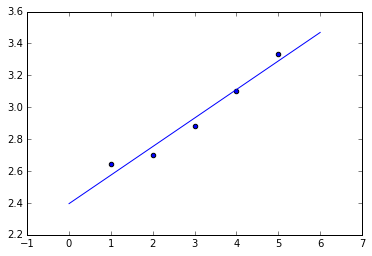

In [14]:
# the argument "1" tells polyfit we are doing an linear regression (linear is degree 1)
coef = np.polyfit(Categories,GPA_mean,1)
print('slope : {}'.format(coef[0]))
print('intercept : {}'.format(coef[1]))

#we plot the regression line along with the data points
fig = plt.figure()
ax = plt.axes()
plt.scatter(Categories, GPA_mean)
# the following two lines plots a line with coefficients by the linear regression model.
x = np.linspace(0, 6, 100)
ax.plot(x, coef[0]*x + coef[1]);

# calculate mean square error
mse = np.mean(((coef[0]*Categories + coef[1] - GPA_mean) ** 2))
print('mean square error : {}'.format(mse))

It seems the five data points lie on a quadratic function. Could you fit the data points to a quadratic function using `numpy.polyfit` and point the quadratic function along with the data points? Write down your code below!

**We can also do linear regression with `scipy.stats.linregress`.** You can learn more about this at <https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html>

In [15]:
from scipy import stats

slope, intercept, r_value, p_value, std_err = stats.linregress(Categories, GPA_mean)

print('slope : {}'.format(slope))
print('intercept : {}'.format(intercept))
print('r-squared : {}'.format(r_value))

slope : 0.17892736315636576
intercept : 2.395559776347926
r-squared : 0.981593533885819


**We can also do linear regression with `sklearn.linear_model.LinearRegression`.** You can learn more about this at <http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression>

In [16]:
# Since the feature input to this package should have dimension [n_samples,n_features], we need to modify our feature
Categories_M = np.expand_dims(Categories.T , axis=1)
print(Categories_M.shape)
GPA_mean_M = GPA_mean.T
print(GPA_mean_M.shape)


(5, 1)
(5,)


In [17]:
from sklearn import linear_model
# fit the linear regression model and get the slope and intercept
reg = linear_model.LinearRegression()

reg.fit(Categories_M,GPA_mean_M)

print('slope : {}'.format(reg.coef_[0]))
print('intercept : {}'.format(reg.intercept_))

slope : 0.17892736315636573
intercept : 2.3955597763479264


As you can see, the three methods yields the same *slope* and *intercept*.

**Next we are gonna use the slope and intercept to predict the average GPA for the test data and calculate the mean square error**

mean square error of prediction: 0.02051660408281074


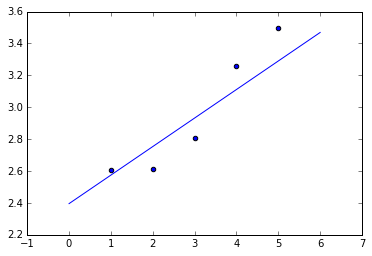

In [18]:
GPA_mean_predict = coef[0]*Categories + coef[1]

GPA_mean_test = category_mean(X_test,y_test)

# Plot GPA mean for test data and 
fig = plt.figure()
ax = plt.axes()
plt.scatter(Categories, GPA_mean_test)
# the following two lines plots a line with coefficients by the linear regression model.
x = np.linspace(0, 6, 100)
ax.plot(x, coef[0]*x + coef[1]);


mse_test = np.mean(((GPA_mean_predict - GPA_mean_test) ** 2))
print('mean square error of prediction: {}'.format(mse_test))

You can also do linear regression to predict mean GPA with science and social skills (`t5c13b`) and math skills (`t5c13c`) respectively.

Next, we do linear regression based on the original training data. In other words, we directly predict GPA instead of mean GPA. Fisrt, fit the model to traning data

mean square error : 0.3928032744536404


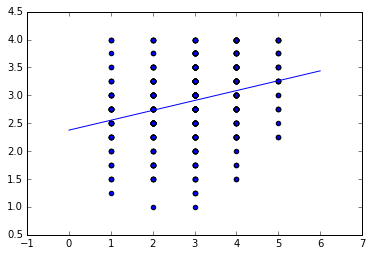

In [19]:
X_train_M = np.expand_dims(X_train, axis=1)

# fit the linear regression model and get the slope and intercept
reg = linear_model.LinearRegression()

reg.fit(X_train_M,y_train)

slope = reg.coef_[0]
intercept = reg.intercept_

#we plot the regression line along with the data points
fig = plt.figure()
ax = plt.axes()
plt.scatter(X_train, y_train)
# the following two lines plots a line with coefficients by the linear regression model.
x = np.linspace(0, 6, 100)
ax.plot(x, slope*x + intercept);

# calculate mean square error
mse = np.mean(((slope*X_train + intercept - y_train) ** 2))
print('mean square error : {}'.format(mse))

Then, use the model to predict GPA for test data

mean square error of prediction: 0.4555071224319616


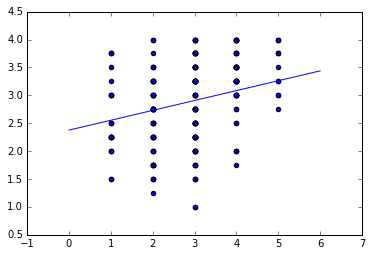

In [20]:
X_test_M = np.expand_dims(X_test, axis=1)
y_predict = reg.predict(X_test_M)

# Plot GPA mean for test data and 
fig = plt.figure()
ax = plt.axes()
plt.scatter(X_test, y_test)
# the following two lines plots a line with coefficients by the linear regression model.
x = np.linspace(0, 6, 100)
ax.plot(x, slope*x + intercept);


mse_test = np.mean(((y_predict - y_test) ** 2))
print('mean square error of prediction: {}'.format(mse_test))

## Multiple Linear Regression

Multiple linear regression is a generalization of linear regression. In multiple linear regression we model the relationship between a continuous variable (called the outcome or the dependent variable) and multiple explanatory variables (called predictors or independent variables). 

As in linear regression, we plot the data on a scatter plot and then compute the best-fit line through the data points. However, we use a different equation for the best-fit line which takes into account the effects of multiple predictors $X_1,X_2,\dots,X_n$: 

The best-fit line is described by the equation:

$$Y = c_0 + c_1 X_1 + c_2 X_2 + c_3 X_3 + \dots + c_n X_n + \epsilon$$

where $c_0$ is the regression coefficient associated with the value of $Y$ when $X=0$, and $c_i$ where $i = 1,2,3,\dots,n$ is the regression coefficient that tells us by how much $Y$ changes when the predictor $X_i$ is not zero. As before, we will set $\epsilon$ to zero, meaning we will ignore the effects of noise.

The best-fit line provides what is known as a linear model which allows us to make predictions about the value of $Y$ given the values of $X_i$.

In this section we will build a multiple linear regression model to predict the child's GPA scores. As predictors, we will use language and literacy skills (feature t5c13a), science and social skills (feature t5c13b), and math skills (feature t5c13c).

In [21]:
#Remember our dataframe X and GPA
X.head()

,t5c13a,t5c13b,t5c13c
challengeID,,,
9,1,2,2
14,3,4,4
16,1,2,2
18,2,2,2
23,2,4,3


In [22]:
GPA.head()

challengeID
9     2.25
14    3.25
16    2.00
18    2.25
23    2.50
Name: gpa, dtype: float64

In [23]:
# Split our data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, GPA, test_size = 0.3, random_state = 100)

print(X_train.shape)

(513, 3)


We can't use `numpy.polyfit` or `scipy.stats.linregress` to do multiple linear regression! (Browse the documentation to understand why)

In this section, we'll use `sklearn.linear_model.LinearRegression` to do multiple linear regression.

In [24]:
# fit the linear regression model and get the slope and intercept
reg = linear_model.LinearRegression()

reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

We denote $X_1$, $X_2$, $X_3$ as three features `t5c13a`, `t5c13b`, `t5c13c`, respectively. Then the multiple regression model can be written as 

$Y = c_0 + c_1 X_1 + c_2 X_2 + c_3 X_3 + \epsilon$

The coefficients can be retrieved from the fitted model.


In [25]:
print('[c_1 c_2 c_3] = {}'.format(reg.coef_))
print('c_0 = {}'.format(reg.intercept_))

[c_1 c_2 c_3] = [ 0.07342398  0.07174348  0.07980745]
c_0 = 2.2323232745488943


We can use this model to predict the GPA for students in the test set.

In [26]:
y_predict = reg.predict(X_test)

# calculate mean square error
mse_test = np.mean(((y_predict - y_test) ** 2))
print('mean square error of prediction : {}'.format(mse_test))

mean square error of prediction : 0.44808348811799903


## Logistic Regression

Logistic regression models the relationship between a binary outcome $Y$ that can be either 1 or 0 and a predictor $X$. The main difference between logistic regression and linear and multiple linear regression is that the resulting model is not linear (it is not a line but a curve) and that it does not predict the value of the outcome $Y$ but instead it predicts the probability that $Y$ is equal to 1.

As in linear regression, we plot the data on a scatter plot and then compute the best-fit curve through the data points using the following equation which takes into account that $Y$ is a binary variable:

$$ \frac{p(Y)}{1-p(Y)} = c_0 + c_1 X + \epsilon$$

where $p(Y)$ is the probability that $Y=1, $$c_0$ is the regression coefficient associated with the probability that $Y=1$ when $X=0$, and $c_1$ is the regression coefficient that tells us how much the probability that $Y=1$ changes when the predictor $X$ is not zero. As before, we will set $\epsilon$ to zero, meaning we will ignore the effects of noise.

The best-fit curve provides a nonlinear model which allows us to make predictions about the probability that $Y=1$ or $Y=0$ given the value of $X$.

In this section we will build a logistic regression model to predict layoff. For the predictor $X$, we will use information about whether the mother had "done regular work for pay last week" in wave 5 (when the child was ~9 years old) (feature m5i4).

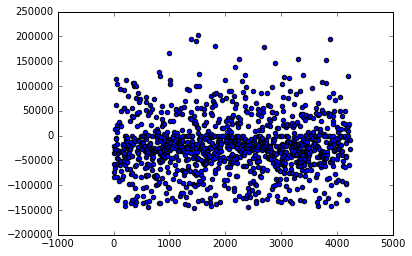

In [307]:
# Choose only those rows of data_frame that are left in outcome
rows_remaining_outcome = outcome.index.values
rows_to_keep_dataframe = data_frame.index.isin(rows_remaining_outcome)
data_frame = data_frame.loc[rows_to_keep_dataframe]

# subselect the column we are interested in
#mom_work = data_frame[['m5i4','m5a2','f5i4','f5a2']]

# print info about features
# note that there are some entries that 
#print(ff.select('cp3food_exp'))

# Feature Engineering. Create new feature that we believe is predictive of eviction. To do this we will combine 
# financial information about the father and the mother and whether they live together when the child is 9 years old.
# We will use features cm5hhinc (father's household income), cf5hhinc (mother's household income), and 
# cf5cohm (do they cohabitate?)

# For couples that cohabitate, we will average the household income
income_coh = (data_frame.cm5hhinc*0.5 + data_frame.cf5hhinc*0.5)*data_frame.cf5cohm 
# For couples that do not cohabitate, we will do a weighted average of the household incomes
# where we give a higher weight to the mother's income
income_notcoh = (data_frame.cm5hhinc*0.75 + data_frame.cf5hhinc*0.25)*(~data_frame.cf5cohm)
# Now we sum them up to get one feature that we can use in the logistic regression
income = income_coh + income_notcoh
#expenses = data_frame.ih4_k2_expen #(data_frame.cp4k2_expen+data_frame.cp4k4_expen+data_frame.cp4k5_expen)
income = pd.DataFrame(income,columns=['Income'])
plt.scatter(income.index,income)

# Note that negative entries mean that there is no info about whether the parents cohabitate

In [308]:
# Impute values. For now, we will remove all values that are negative
X = income[income>0]
X.dropna(inplace=True)
Y = outcome.loc[outcome.index.isin(X.index.values)]
#picks out layoff
eviction = Y.eviction
# remove NaN entries in layoff
eviction = eviction[~np.isnan(eviction)]
# match columns with X
X = X.loc[eviction.index]
#make sure the the number of rows are the same
print(X.shape)
print(eviction.shape)

(330, 1)
(330,)


In [309]:
# Split our data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, eviction, test_size = 0.3, random_state = 100)

print(X_train.shape)
print(y_train.shape)

(231, 1)
(231,)


slope : [[ -4.52706208e-05]]
intercept : [ -4.45227129e-09]


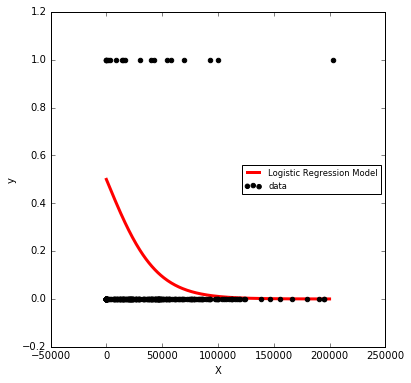

In [310]:
from sklearn import linear_model
# fit the linear regression model and get the slope and intercept
reg = linear_model.LogisticRegression()

reg.fit(X_train,y_train)

print('slope : {}'.format(reg.coef_))
print('intercept : {}'.format(reg.intercept_))

# and plot the result
plt.figure(1, figsize=(6, 6))
plt.clf()
plt.scatter(X_train, y_train, color='black', zorder=20)
linspace = np.linspace(-5, 200000, 300)

def model(x):
    return 1 / (1 + np.exp(-x))

loss = model(linspace * reg.coef_ + reg.intercept_)
plt.plot(linspace, loss.ravel(), color='red', linewidth=3)
plt.ylabel('y')
plt.xlabel('X')
#plt.xticks(range(-5, 10))
#plt.yticks([0, 0.5, 1])
#plt.ylim(-.25, 1.25)
#plt.xlim(-4, 10)
plt.legend(('Logistic Regression Model','data'),
           loc="center right", fontsize='small')
plt.show()

## Multiple Logistic Regression

Multiple logistic regression models is the generalization of logistic regression to multiple predictors. That is, multiple logistic regression models the relationship between a binary outcome $Y$ that can be either 1 or 0 and multiple predictors $X_i$. 

The model is given by the equation

$$ \frac{p(Y)}{1-p(Y)} = c_0 + c_1 X_1 + c_2 X_2 + c_3 X_3 + \dots + c_n X_n + \epsilon$$

where $p(Y)$ is the probability that $Y=1, $$c_0$ is the regression coefficient associated with the probability that $Y=1$ when $X_i=0$ for all $i$, and $c_i$ is the regression coefficient that tells us how much the probability that $Y=1$ changes when the predictor $X_i$ is not zero. As before, we will set $\epsilon$ to zero, meaning we will ignore the effects of noise.

The best-fit curve provides a nonlinear model which allows us to make predictions about the probability that $Y=1$ or $Y=0$ given the values of $X_i$.

In this section we will build a multiple logistic regression model to predict eviction. For the predictor $X$ predictor, we will use SOMETHING (feature XXXXXXX) and SOMETHING2 (feature XXXX2).

In [301]:
from sklearn.preprocessing import OneHotEncoder
# subselect the column we are interested in
features = data_frame[['m5i4','m5f23d','f5i4','f5f23d']]
features['m5i4'] = features.m5i4.astype(str)
features['m5f23d'] = features.m5i4.astype(str)
features['f5i4'] = features.m5i4.astype(str)
features['f5f23d'] = features.m5i4.astype(str)
X = pd.get_dummies(features)

C:\Users\Renato\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Renato\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Renato\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexi

In [303]:
X = X.loc[eviction.index]
#make sure the the number of rows are the same
print(X.shape)
print(eviction.shape)
# Split our data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, eviction, test_size = 0.3, random_state = 100)

(330, 20)
(330,)
